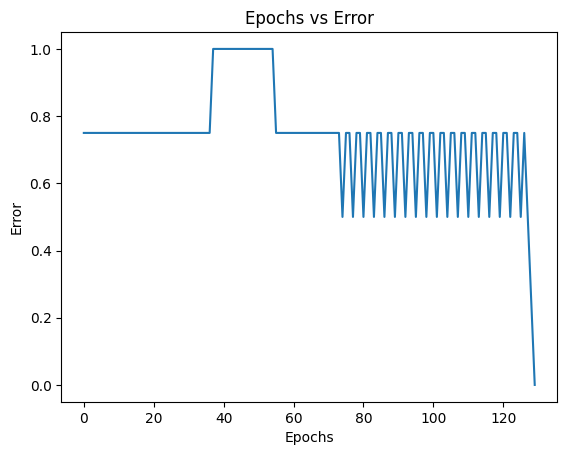

Number of epochs: 129
Final weights after training: [-0.1   0.1   0.05]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def step_activation(x):
    return np.where(x >= 0, 1, 0)

def train_perceptron(inputs, outputs, weights, learning_rate, max_epochs=1000, convergence_error=0.002):
    num_epochs = 0
    errors = []

    while num_epochs < max_epochs:
        total_error = 0
        for i, input_val in enumerate(inputs):
            # Add bias to input
            input_with_bias = np.insert(input_val, 0, 1)  
            # Calculate weighted sum
            weighted_sum = np.dot(input_with_bias, weights)
            # Apply step activation function
            predicted = step_activation(weighted_sum)
            # Calculate error
            error = outputs[i] - predicted
            # Update total error for this epoch
            total_error += error**2
            # Update weights using perceptron learning rule
            weights += learning_rate * error * input_with_bias
        
        # Calculate mean squared error for this epoch
        mean_squared_error = total_error / len(inputs)
        # Store error for plotting
        errors.append(mean_squared_error)
        
        # Check for convergence
        if mean_squared_error <= convergence_error:
            break
        
        num_epochs += 1

    return errors, weights, num_epochs

if __name__ == "__main__":
    # Define inputs, outputs, initial weights, and learning rate
    inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    outputs = np.array([0, 0, 0, 1])
    initial_weights = np.array([10, 0.2, -0.75])
    learning_rate = 0.05

    # Train the perceptron
    errors, final_weights, num_epochs = train_perceptron(inputs, outputs, initial_weights, learning_rate)

    # Plotting the errors
    plt.plot(errors)
    plt.title("Epochs vs Error")
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.show()

    # Print results
    print("Number of epochs:", num_epochs)
    print("Final weights after training:", final_weights)


Step Activation: Converged after 130 epochs.
Bipolar Step Activation: Converged after 1000 epochs.
Sigmoid Activation: Converged after 130 epochs.
ReLU Activation: Converged after 315 epochs.


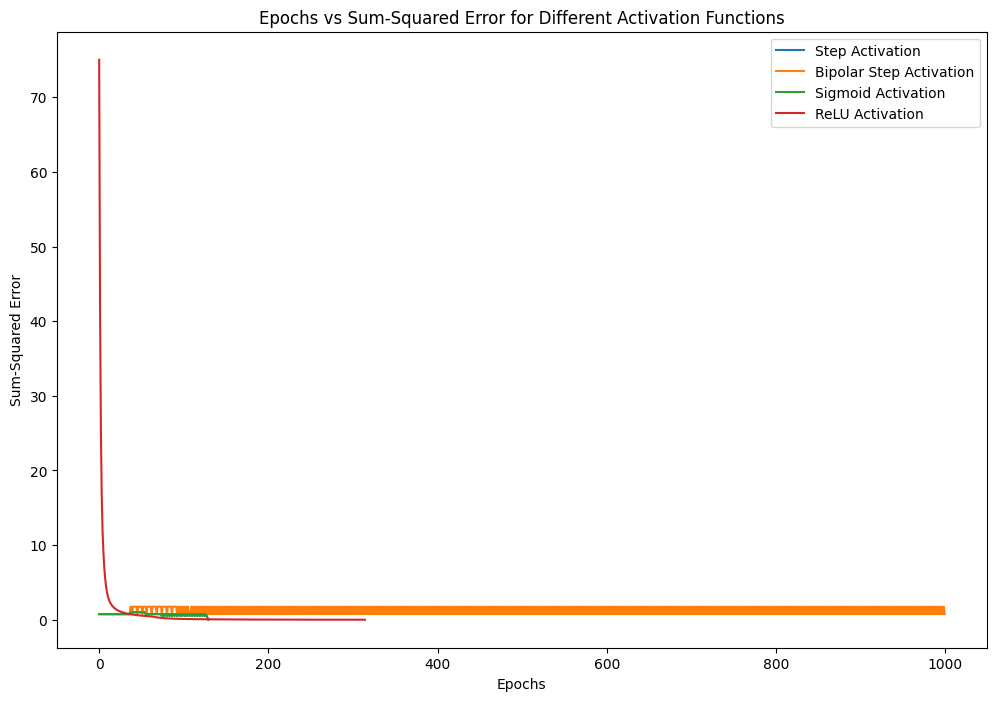

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation functions
def step_activation(x):
    #Step Activation Function: Returns 1 if input is greater than 0, else 0.
    return np.where(x > 0, 1, 0)

def bipolar_step_activation(x):
    #Bipolar Step Activation Function: Returns 1 if input is greater than 0, else -1.
    return np.where(x > 0, 1, -1)

def sigmoid_activation(x):
   #Sigmoid Activation Function: Returns 1 / (1 + exp(-x)).
    return 1 / (1 + np.exp(-x))

def relu_activation(x):
    #ReLU Activation Function: Returns max(0, x).
    return np.maximum(0, x)

# Define the training function for perceptron
def train_perceptron(X, Y, W, alpha, threshold, max_epochs, activation_func):
    errors = []
    for epoch in range(max_epochs):
        error_sum = 0
        for x, y in zip(X, Y):
            weighted_sum = np.dot(W, x)
            output = activation_func(weighted_sum) if activation_func != sigmoid_activation else activation_func(weighted_sum) > 0.5
            error = y - output
            W += alpha * error * x
            error_sum += (error**2).sum()
        mse = error_sum / len(X)
        errors.append(mse)
        if mse <= threshold:
            break
    return errors, W

# Main program
if __name__ == "__main__":
    W_init = np.array([10, 0.2, -0.75])
    alpha = 0.05
    threshold = 0.002
    max_epochs = 1000
    X = np.array([[1, 0, 0],
                  [1, 0, 1],
                  [1, 1, 0],
                  [1, 1, 1]])
    Y = np.array([0, 0, 0, 1])

    # Train perceptron with different activation functions
    errors_step, W_step = train_perceptron(X, Y, W_init.copy(), alpha, threshold, max_epochs, step_activation)
    errors_bipolar_step, W_bipolar_step = train_perceptron(X, Y, W_init.copy(), alpha, threshold, max_epochs, bipolar_step_activation)
    errors_sigmoid, W_sigmoid = train_perceptron(X, Y, W_init.copy(), alpha, threshold, max_epochs, sigmoid_activation)
    errors_relu, W_relu = train_perceptron(X, Y, W_init.copy(), alpha, threshold, max_epochs, relu_activation)

    # Print convergence information
    print(f"Step Activation: Converged after {len(errors_step)} epochs.")
    print(f"Bipolar Step Activation: Converged after {len(errors_bipolar_step)} epochs.")
    print(f"Sigmoid Activation: Converged after {len(errors_sigmoid)} epochs.")
    print(f"ReLU Activation: Converged after {len(errors_relu)} epochs.")

    # Plotting the errors
    plt.figure(figsize=(12, 8))
    plt.plot(errors_step, label='Step Activation')
    plt.plot(errors_bipolar_step, label='Bipolar Step Activation')
    plt.plot(errors_sigmoid, label='Sigmoid Activation')
    plt.plot(errors_relu, label='ReLU Activation')
    plt.title('Epochs vs Sum-Squared Error for Different Activation Functions')
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Squared Error')
    plt.legend()
    plt.show()


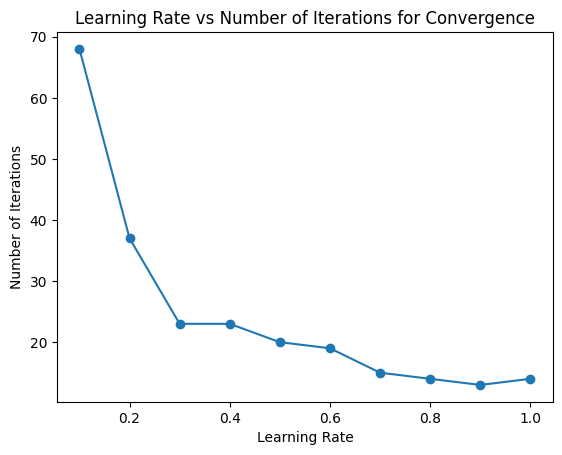

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def step_activation(x):
    #Step activation function for perceptron.
    return np.where(x > 0, 1, 0)

def train_perceptron_varying_lr(X, Y, W, learning_rates, threshold, max_epochs):
    iterations_taken = []
    for alpha in learning_rates:
        current_W = np.copy(W)
        for epoch in range(max_epochs):
            error_sum = 0
            for x, y in zip(X, Y):
                weighted_sum = np.dot(current_W, x)
                output = step_activation(weighted_sum)
                error = y - output
                current_W += alpha * error * x
                error_sum += error**2
            mse = error_sum / len(X)
            if mse <= threshold:
                iterations_taken.append(epoch + 1)
                break
        else:
            iterations_taken.append(max_epochs)
    return iterations_taken

def plot_learning_rate_vs_iterations(learning_rates, iterations_taken):
    plt.plot(learning_rates, iterations_taken, marker='o')
    plt.title('Learning Rate vs Number of Iterations for Convergence')
    plt.xlabel('Learning Rate')
    plt.ylabel('Number of Iterations')
    plt.show()

if __name__ == "__main__":
    # Input values
    W = np.array([10, 0.2, -0.75])
    threshold = 0.002
    max_epochs = 1000
    X = np.array([[1, 0, 0],
                  [1, 0, 1],
                  [1, 1, 0],
                  [1, 1, 1]])
    Y = np.array([0, 0, 0, 1])
    learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

    # Training the perceptron with varying learning rates
    iterations_taken = train_perceptron_varying_lr(X, Y, W, learning_rates, threshold, max_epochs)

    # Plotting the results
    plot_learning_rate_vs_iterations(learning_rates, iterations_taken)


In [5]:
import numpy as np

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Function to train the neural network
def train_neural_network(X, y, input_size, hidden_size, output_size, learning_rate, epochs):
    np.random.seed(42)
    
    # Initialize random weights for input to hidden layer and hidden to output layer
    weights_input_to_hidden = np.random.uniform(size=(input_size, hidden_size))
    weights_hidden_to_output = np.random.uniform(size=(hidden_size, output_size))
    
    # Training loop
    for epoch in range(epochs):
        # Forward pass
        hidden_layer_input = np.dot(X, weights_input_to_hidden)
        hidden_layer_output = sigmoid(hidden_layer_input)
        final_input = np.dot(hidden_layer_output, weights_hidden_to_output)
        final_output = sigmoid(final_input)
        
        # Backpropagation
        error = y - final_output
        d_error = error * sigmoid_derivative(final_output)
        error_hidden_layer = d_error.dot(weights_hidden_to_output.T)
        d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
        
        # Update weights
        weights_hidden_to_output += hidden_layer_output.T.dot(d_error) * learning_rate
        weights_input_to_hidden += X.T.dot(d_hidden_layer) * learning_rate
        
        # Print loss every 1000 epochs
        if (epoch+1) % 1000 == 0:
            loss = np.mean(np.square(error))
            print(f'Epoch {epoch+1}, Loss: {loss}')
    
    return final_output

# Main program
if __name__ == "__main__":
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])
    
    input_size = X.shape[1]
    hidden_size = 2
    output_size = 1
    learning_rate = 0.1
    epochs = 10000
    
    final_output = train_neural_network(X, y, input_size, hidden_size, output_size, learning_rate, epochs)
    
    print("Output from neural network after 10,000 epochs:")
    print(final_output)


Epoch 1000, Loss: 0.24957908261462425
Epoch 2000, Loss: 0.2467414203717494
Epoch 3000, Loss: 0.22835967877808322
Epoch 4000, Loss: 0.192022786271512
Epoch 5000, Loss: 0.1584540600975413
Epoch 6000, Loss: 0.13242813739308076
Epoch 7000, Loss: 0.11244424083450666
Epoch 8000, Loss: 0.09690500087211683
Epoch 9000, Loss: 0.08461926353649167
Epoch 10000, Loss: 0.07474428167075502
Output from neural network after 10,000 epochs:
[[0.20369158]
 [0.73603066]
 [0.73604444]
 [0.34370702]]


In [6]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def train_neural_network(X, Y, learning_rate=0.05, epochs=10000):
    np.random.seed(42)
    weights = np.random.rand(X.shape[1] + 1, 1)

    for epoch in range(epochs):
        inputs = np.hstack((X, np.ones((X.shape[0], 1))))
        weighted_sum = np.dot(inputs, weights)
        outputs = sigmoid(weighted_sum)
        error = Y - outputs
        adjustments = error * sigmoid_derivative(outputs)
        weights += np.dot(inputs.T, adjustments) * learning_rate

        if epoch % 1000 == 0:
            loss = np.mean(np.square(error))
            print(f'Epoch: {epoch}, Loss: {loss:.4f}')

    return weights

def predict_classes(X, weights):
    predictions = sigmoid(np.dot(np.hstack((X, np.ones((X.shape[0], 1)))), weights))
    predicted_classes = [1 if i > 0.5 else 0 for i in predictions]
    return predicted_classes

if __name__ == "__main__":
    X = np.array([
        [20, 6, 2],
        [16, 3, 6],
        [27, 6, 2],
        [19, 1, 2],
        [24, 4, 2],
        [22, 1, 5],
        [15, 4, 2],
        [18, 4, 2],
        [21, 1, 4],
        [16, 2, 4]
    ])
    Y = np.array([[1], [1], [1], [0], [1], [0], [1], [1], [0], [0]])

    # Normalize input data
    X_normalized = X / np.max(X, axis=0)

    # Train the neural network
    trained_weights = train_neural_network(X_normalized, Y)

    print("Final weights after training:")
    print(trained_weights)

    # Predict classes
    predicted_classes = predict_classes(X_normalized, trained_weights)
    print("Predicted classes:")
    print(predicted_classes)


Epoch: 0, Loss: 0.2796
Epoch: 1000, Loss: 0.0525
Epoch: 2000, Loss: 0.0348
Epoch: 3000, Loss: 0.0271
Epoch: 4000, Loss: 0.0225
Epoch: 5000, Loss: 0.0194
Epoch: 6000, Loss: 0.0171
Epoch: 7000, Loss: 0.0153
Epoch: 8000, Loss: 0.0138
Epoch: 9000, Loss: 0.0126
Final weights after training:
[[-2.28513235]
 [13.1334513 ]
 [ 1.05405756]
 [-4.82793625]]
Predicted classes:
[1, 1, 1, 0, 1, 0, 1, 1, 0, 0]


In [7]:
import numpy as np

def normalize_features(X):
    X_normalized = X / np.max(X, axis=0)
    return X_normalized

def add_bias_feature(X):
    X_bias = np.hstack((X, np.ones((X.shape[0], 1))))
    return X_bias

def calculate_pseudo_inverse_weights(X, Y):
    weights_pseudo_inverse = np.dot(np.linalg.pinv(X), Y)
    return weights_pseudo_inverse

def predict_classes(X_bias, weights):
    predictions = np.dot(X_bias, weights)
    predicted_classes = [1 if i > 0.5 else 0 for i in predictions]
    return predicted_classes

# Main Program
if __name__ == "__main__":
    X = np.array([
        [20, 6, 2],
        [16, 3, 6],
        [27, 6, 2],
        [19, 1, 2],
        [24, 4, 2],
        [22, 1, 5],
        [15, 4, 2],
        [18, 4, 2],
        [21, 1, 4],
        [16, 2, 4]
    ])
    Y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])
    
    X_normalized = normalize_features(X)
    X_bias = add_bias_feature(X_normalized)
    weights_pseudo_inverse = calculate_pseudo_inverse_weights(X_bias, Y)
    predicted_classes = predict_classes(X_bias, weights_pseudo_inverse)
    
    print("Predicted classes using Pseudo-Inverse:")
    print(predicted_classes)


Predicted classes using Pseudo-Inverse:
[1, 1, 1, 0, 1, 0, 1, 1, 0, 0]


In [8]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return x * (1 - x)


def train_neural_network(X, Y, input_size, hidden_size, output_size, learning_rate=0.05, max_epochs=1000, threshold=0.002):
    np.random.seed(42)

    # Initialize random weights
    weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
    weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))

    for epoch in range(max_epochs):
        # Forward pass
        hidden_layer_input = np.dot(X, weights_input_hidden)
        hidden_layer_output = sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
        predicted_output = sigmoid(output_layer_input)

        # Calculate error
        error = Y - predicted_output

        # Check for convergence
        if np.mean(np.abs(error)) <= threshold:
            break

        # Backpropagation
        d_predicted_output = error * sigmoid_derivative(predicted_output)
        error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
        d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

        # Update weights
        weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
        weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

    return weights_input_hidden, weights_hidden_output, epoch + 1

if __name__ == "__main__":
    # Define input data and parameters
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([[0], [0], [0], [1]])
    input_size = X.shape[1]
    hidden_size = 2
    output_size = 1
    learning_rate = 0.05
    max_epochs = 1000
    threshold = 0.002

    # Train the neural network
    weights_input_hidden, weights_hidden_output, epochs = train_neural_network(X, Y, input_size, hidden_size, output_size, learning_rate, max_epochs, threshold)

    # Print results
    print(f"Learning converged after {epochs} epochs.")
    print("Final weights from input to hidden layer:\n", weights_input_hidden)
    print("Final weights from hidden to output layer:\n", weights_hidden_output)


Learning converged after 1000 epochs.
Final weights from input to hidden layer:
 [[-0.21722932  0.64854177]
 [ 0.10298689  0.33198645]]
Final weights from hidden to output layer:
 [[-1.08180358]
 [-0.64798084]]


In [9]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def train_neural_network(X, Y, input_layer_size, hidden_layer_size, output_layer_size, learning_rate, epochs):
    np.random.seed(1)
    weights_input_hidden = 2 * np.random.random((input_layer_size, hidden_layer_size)) - 1
    weights_hidden_output = 2 * np.random.random((hidden_layer_size, output_layer_size)) - 1
    errors = []

    for i in range(epochs):
        input_layer = X
        hidden_layer = sigmoid(np.dot(input_layer, weights_input_hidden))
        output_layer = sigmoid(np.dot(hidden_layer, weights_hidden_output))
        
        output_error = Y - output_layer
        output_delta = output_error * sigmoid_derivative(output_layer)
        
        hidden_error = output_delta.dot(weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(hidden_layer)
        
        weights_hidden_output += hidden_layer.T.dot(output_delta) * learning_rate
        weights_input_hidden += input_layer.T.dot(hidden_delta) * learning_rate
        
        errors.append(np.mean(np.abs(output_error)))
    
    return weights_input_hidden, weights_hidden_output, errors

if __name__ == "__main__":
    # Input data and parameters
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([[1, 0], [0, 1], [0, 1], [1, 0]]) 
    input_layer_size = 2
    hidden_layer_size = 2 
    output_layer_size = 2  
    learning_rate = 0.1  
    epochs = 60000

    # Train the neural network
    weights_input_hidden, weights_hidden_output, errors = train_neural_network(X, Y, input_layer_size, hidden_layer_size, output_layer_size, learning_rate, epochs)

    # Print final output and errors
    print("Final output after training:")
    input_layer = X
    hidden_layer = sigmoid(np.dot(input_layer, weights_input_hidden))
    output_layer = sigmoid(np.dot(hidden_layer, weights_hidden_output))
    print(output_layer)

    print("\nErrors during training:")
    for i, error in enumerate(errors):
        if i % 10000 == 0:
            print(f"Error at epoch {i}: {error}")


Final output after training:
[[0.97650046 0.02347449]
 [0.50015958 0.49984038]
 [0.02090088 0.97912069]
 [0.49968249 0.5003176 ]]

Errors during training:
Error at epoch 0: 0.5000354597450124
Error at epoch 10000: 0.2859074877278662
Error at epoch 20000: 0.27138998879730275
Error at epoch 30000: 0.2666273551910979
Error at epoch 40000: 0.2640626867051268
Error at epoch 50000: 0.26240131960218327


In [10]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def neural_network_training(X, Y, input_layer_size, hidden_layer_size, output_layer_size, learning_rate, epochs):

    # Initialize random weights
    np.random.seed(1)
    weights_input_hidden = 2 * np.random.random((input_layer_size, hidden_layer_size)) - 1
    weights_hidden_output = 2 * np.random.random((hidden_layer_size, output_layer_size)) - 1

    # Training loop
    for i in range(epochs):
        input_layer = X
        hidden_layer = sigmoid(np.dot(input_layer, weights_input_hidden))
        output_layer = sigmoid(np.dot(hidden_layer, weights_hidden_output))

        # Calculate errors and deltas
        output_error = Y - output_layer
        output_delta = output_error * sigmoid_derivative(output_layer)
        hidden_error = output_delta.dot(weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(hidden_layer)

        # Update weights
        weights_hidden_output += hidden_layer.T.dot(output_delta) * learning_rate
        weights_input_hidden += input_layer.T.dot(hidden_delta) * learning_rate

        # Print error at intervals
        if i % 10000 == 0:
            error = np.mean(np.abs(output_error))
            print(f"Error at epoch {i}: {error}")

    return weights_input_hidden, weights_hidden_output

if __name__ == "__main__":
    # Input data and parameters
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])
    input_layer_size = 2
    hidden_layer_size = 2
    output_layer_size = 2
    learning_rate = 0.1
    epochs = 60000

    # Train the neural network
    weights_input_hidden, weights_hidden_output = neural_network_training(X, Y, input_layer_size, hidden_layer_size, output_layer_size, learning_rate, epochs)

    # Final output after training
    input_layer = X
    hidden_layer = sigmoid(np.dot(input_layer, weights_input_hidden))
    output_layer = sigmoid(np.dot(hidden_layer, weights_hidden_output))
    print("Final output after training:")
    print(output_layer)


Error at epoch 0: 0.5000354597450124
Error at epoch 10000: 0.2859074877278662
Error at epoch 20000: 0.27138998879730275
Error at epoch 30000: 0.2666273551910979
Error at epoch 40000: 0.2640626867051268
Error at epoch 50000: 0.26240131960218327
Final output after training:
[[0.97650046 0.02347449]
 [0.50015958 0.49984038]
 [0.02090088 0.97912069]
 [0.49968249 0.5003176 ]]


In [11]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# Function to train and return the MLP model
def train_mlp(X, Y, hidden_layer_sizes=(10,), max_iter=1000):
    mlp_model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                              max_iter=max_iter,
                              activation='logistic',
                              solver='adam',
                              random_state=1)
    mlp_model.fit(X, Y)
    return mlp_model

# Function to print predictions for the given model and input data
def print_predictions(model, X):
    predictions = model.predict(X)
    print(predictions)

# Main program
if __name__ == "__main__":
    X_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

    # AND Gate
    Y_and = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])
    mlp_and = train_mlp(X_data, Y_and)
    
    # XOR Gate
    Y_xor = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])
    mlp_xor = train_mlp(X_data, Y_xor)
    
    # Print predictions
    print("AND Gate Predictions:")
    print_predictions(mlp_and, X_data)
    
    print("\nXOR Gate Predictions:")
    print_predictions(mlp_xor, X_data)


AND Gate Predictions:
[[1 0]
 [1 0]
 [1 0]
 [1 0]]

XOR Gate Predictions:
[[0 1]
 [0 1]
 [0 0]
 [1 1]]


C:\Users\garik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def load_data(features_path, labels_path):
    features = np.load(features_path)
    labels = np.load(labels_path)
    return features, labels

def split_data(features, labels, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def train_model(X_train, y_train, hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, activation=activation, solver=solver, random_state=random_state)
    mlp.fit(X_train, y_train)
    return mlp

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# Main program
if __name__ == "__main__":
    # Paths to the data files
    features_path = 'D:\SEM-4\ML\CODES\Machine-Learning\Lab04\extracted_features.npy'
    labels_path = 'D:\SEM-4\ML\CODES\Machine-Learning\Lab04\labels.npy'
    
    # Load the data
    features, labels = load_data(features_path, labels_path)
    
    # Split the data
    X_train, X_test, y_train, y_test = split_data(features, labels)
    
    # Train the model
    mlp_model = train_model(X_train, y_train)
    
    # Evaluate the model
    accuracy = evaluate_model(mlp_model, X_test, y_test)
    
    # Print the accuracy
    print(f'Accuracy: {accuracy}')


Accuracy: 0.514235294117647


C:\Users\garik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
